In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas
import pickle
import glob
import re
from scipy import interpolate
import matplotlib as mpl
from matplotlib import ticker, cm
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [2]:
files = glob.glob('FULL/*.dat')

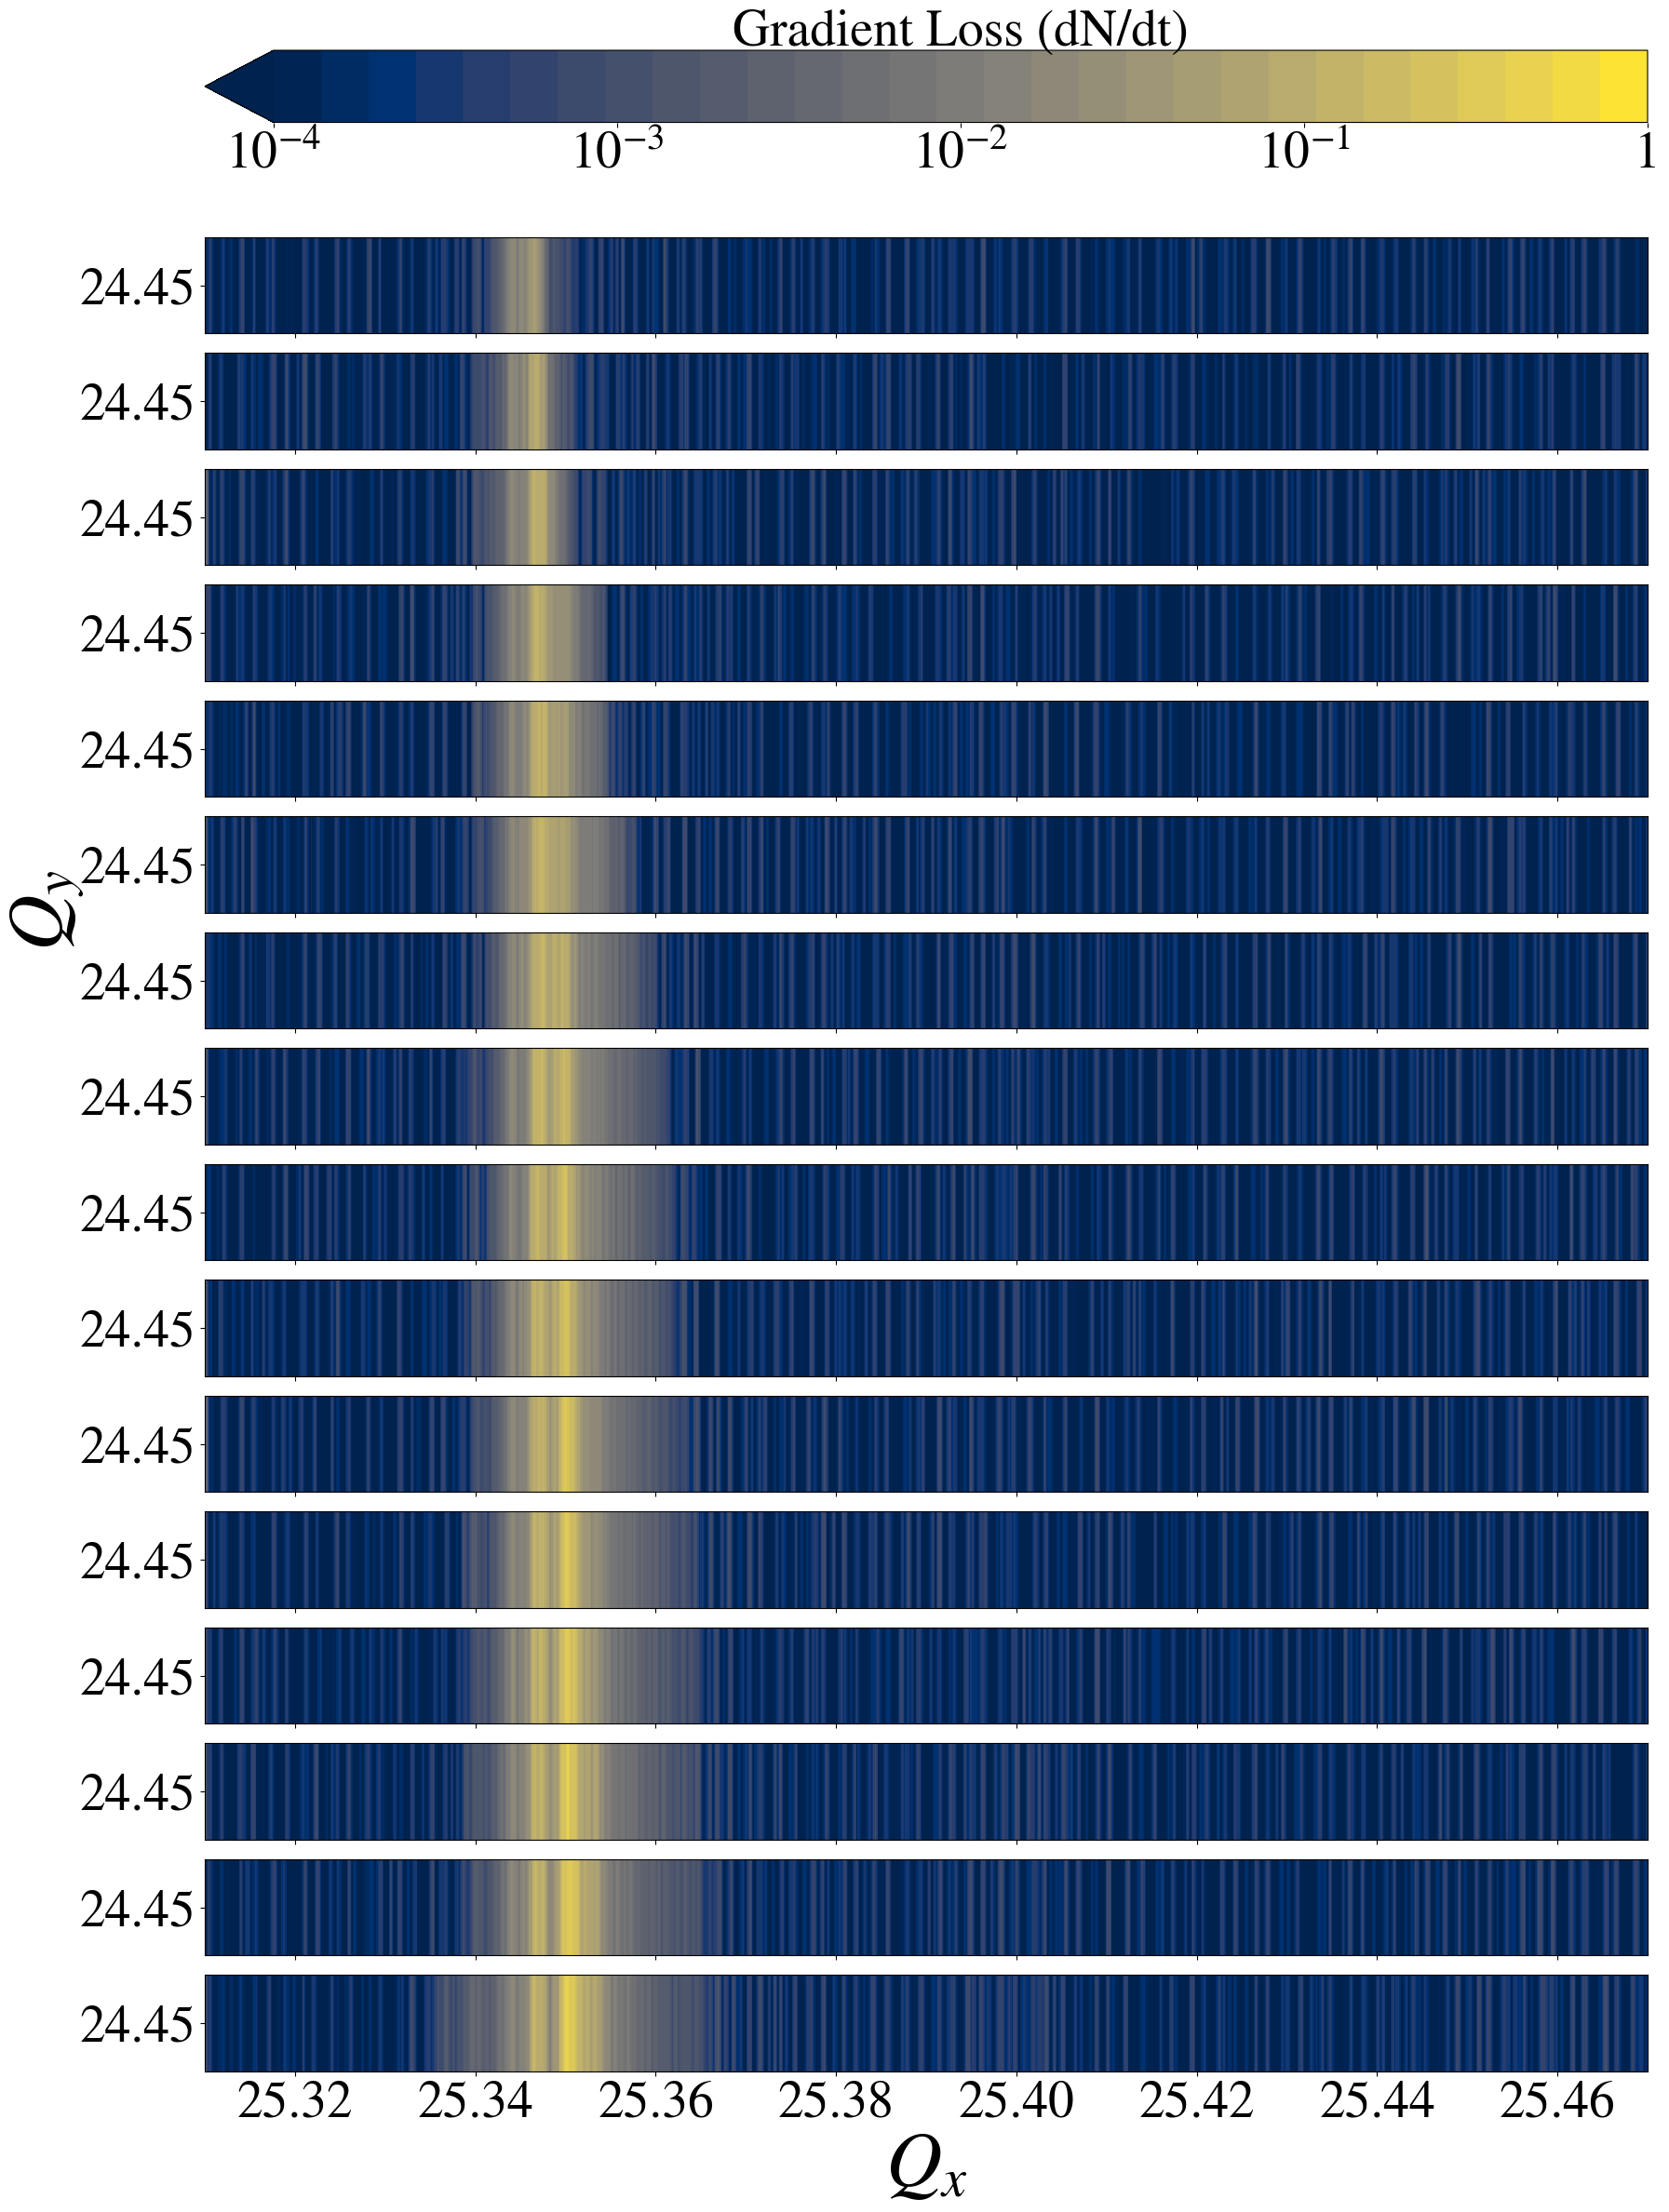

In [10]:
boosterturns = np.arange(2,18)

fig,axs=plt.subplots(len(files),1, figsize = (20,2*len(files)), sharex = True, sharey = True)

i = 0

lolim = -4
hilim = 0

levs = np.logspace(lolim,hilim,num = 30)

for boosterturnsi in boosterturns:
    
    file = 'FULL/CG_05242023_%dTURNS.dat'%boosterturnsi
    
    ifile = open(file, 'rb')
    data = pickle.load(ifile, encoding="bytes")
    
    htune = []
    vtune = []
    
    time = []
    rbeam = []
    
    for measurement in data.keys():
        
        vtune.append(data[measurement][b'vtune'])
        htune.append(data[measurement][b'htune'])
    
        timei = np.array(data[measurement][b'time'])
        rbeami = np.array(data[measurement][b'beam'])
        
        mask1 = (timei>=0.038)*(timei<=0.81)
        #mask2 = rbeami>0.01
        mask = mask1#*mask2
        
        timeimasked = timei[mask]
        rbeamimasked = rbeami[mask]
        
        rbeaminti = interpolate.interp1d(timeimasked, rbeamimasked, kind = 'nearest-up')
        
        timeifinal = np.arange(0.04,0.8,0.001)
        rbeamifinal = rbeaminti(timeifinal)
        
        #axs[i].plot(timeifinal,rbeamifinal,'o',markersize=1)
        #axs[i].plot(timeimasked,np.gradient(rbeamimasked))
        
        time.append(timeifinal)
        rbeam.append(rbeamifinal)
        
    #print(htune,vtune)
    htune = np.mean(htune,axis=0)
    vtune = np.mean(vtune,axis=0)
    
    timeave = np.mean(time,axis=0)
    rbeamave = np.mean(rbeam,axis=0)
    
    steps = len(rbeamave)
    htuneplot = np.linspace(np.min(htune),np.max(htune),steps)
    vtuneplot = np.linspace(0.9999*np.min(vtune),1.0001*np.max(vtune),steps)
    
    gridx,gridy = np.meshgrid(htuneplot, vtuneplot)
    rbeamplot = np.tile(-np.gradient(rbeamave)[::-1],(steps,1))
    
    for k in range(rbeamplot.shape[0]):
        rbeamplot[k,rbeamplot[k,:]<=0]=10**lolim
    
    cf = axs[i].contourf(gridx,gridy,rbeamplot,locator=ticker.LogLocator(numticks=10),
                         levels=levs,cmap = 'cividis',extend = 'min')
    #axs[i].plot(timeave,np.gradient(rbeamave))
    
    totalrbeam = np.max(rbeamave)*10e12
    ppb = totalrbeam/81
    #axs[i].set_title('BOOSTER TURNS=%d, R:BEAM=%.3e, PPB=%.3e'%(boosterturnsi,totalrbeam,ppb),fontsize = 28)
    
    axs[i].set_yticks([24.45])
    axs[i].set_yticklabels([r'24.45'],fontsize = 40)
    
    axs[i].tick_params(axis='x', labelsize=40)
    #axs[i].label_outer()
    
    i=i+1

plt.xlabel('$Q_x$',fontsize=60)
fig.supylabel('$Q_y$',fontsize=60)    

#cbar = fig.colorbar(cf, ticks=np.logspace(-4,0,num = 5))    
cbar = fig.colorbar(cf, ax=axs.ravel().tolist(), ticks=np.logspace(lolim,hilim,num = 5), 
                    orientation = 'horizontal', location = 'top', ticklocation = 'bottom')

cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.set_xticklabels([r'$10^{-4}$',r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'1'],fontsize = 40)
#cbar.ax.tick_params(axis='x', top=False, labeltop=True, bottom=True, labelbottom=False)
cbar.ax.set_xlabel('Gradient Loss (dN/dt)', fontsize = 40)

for ax in axs:
    ax.label_outer()

fig.patch.set_facecolor('white')
#plt.tight_layout()
plt.show()
plt.close()

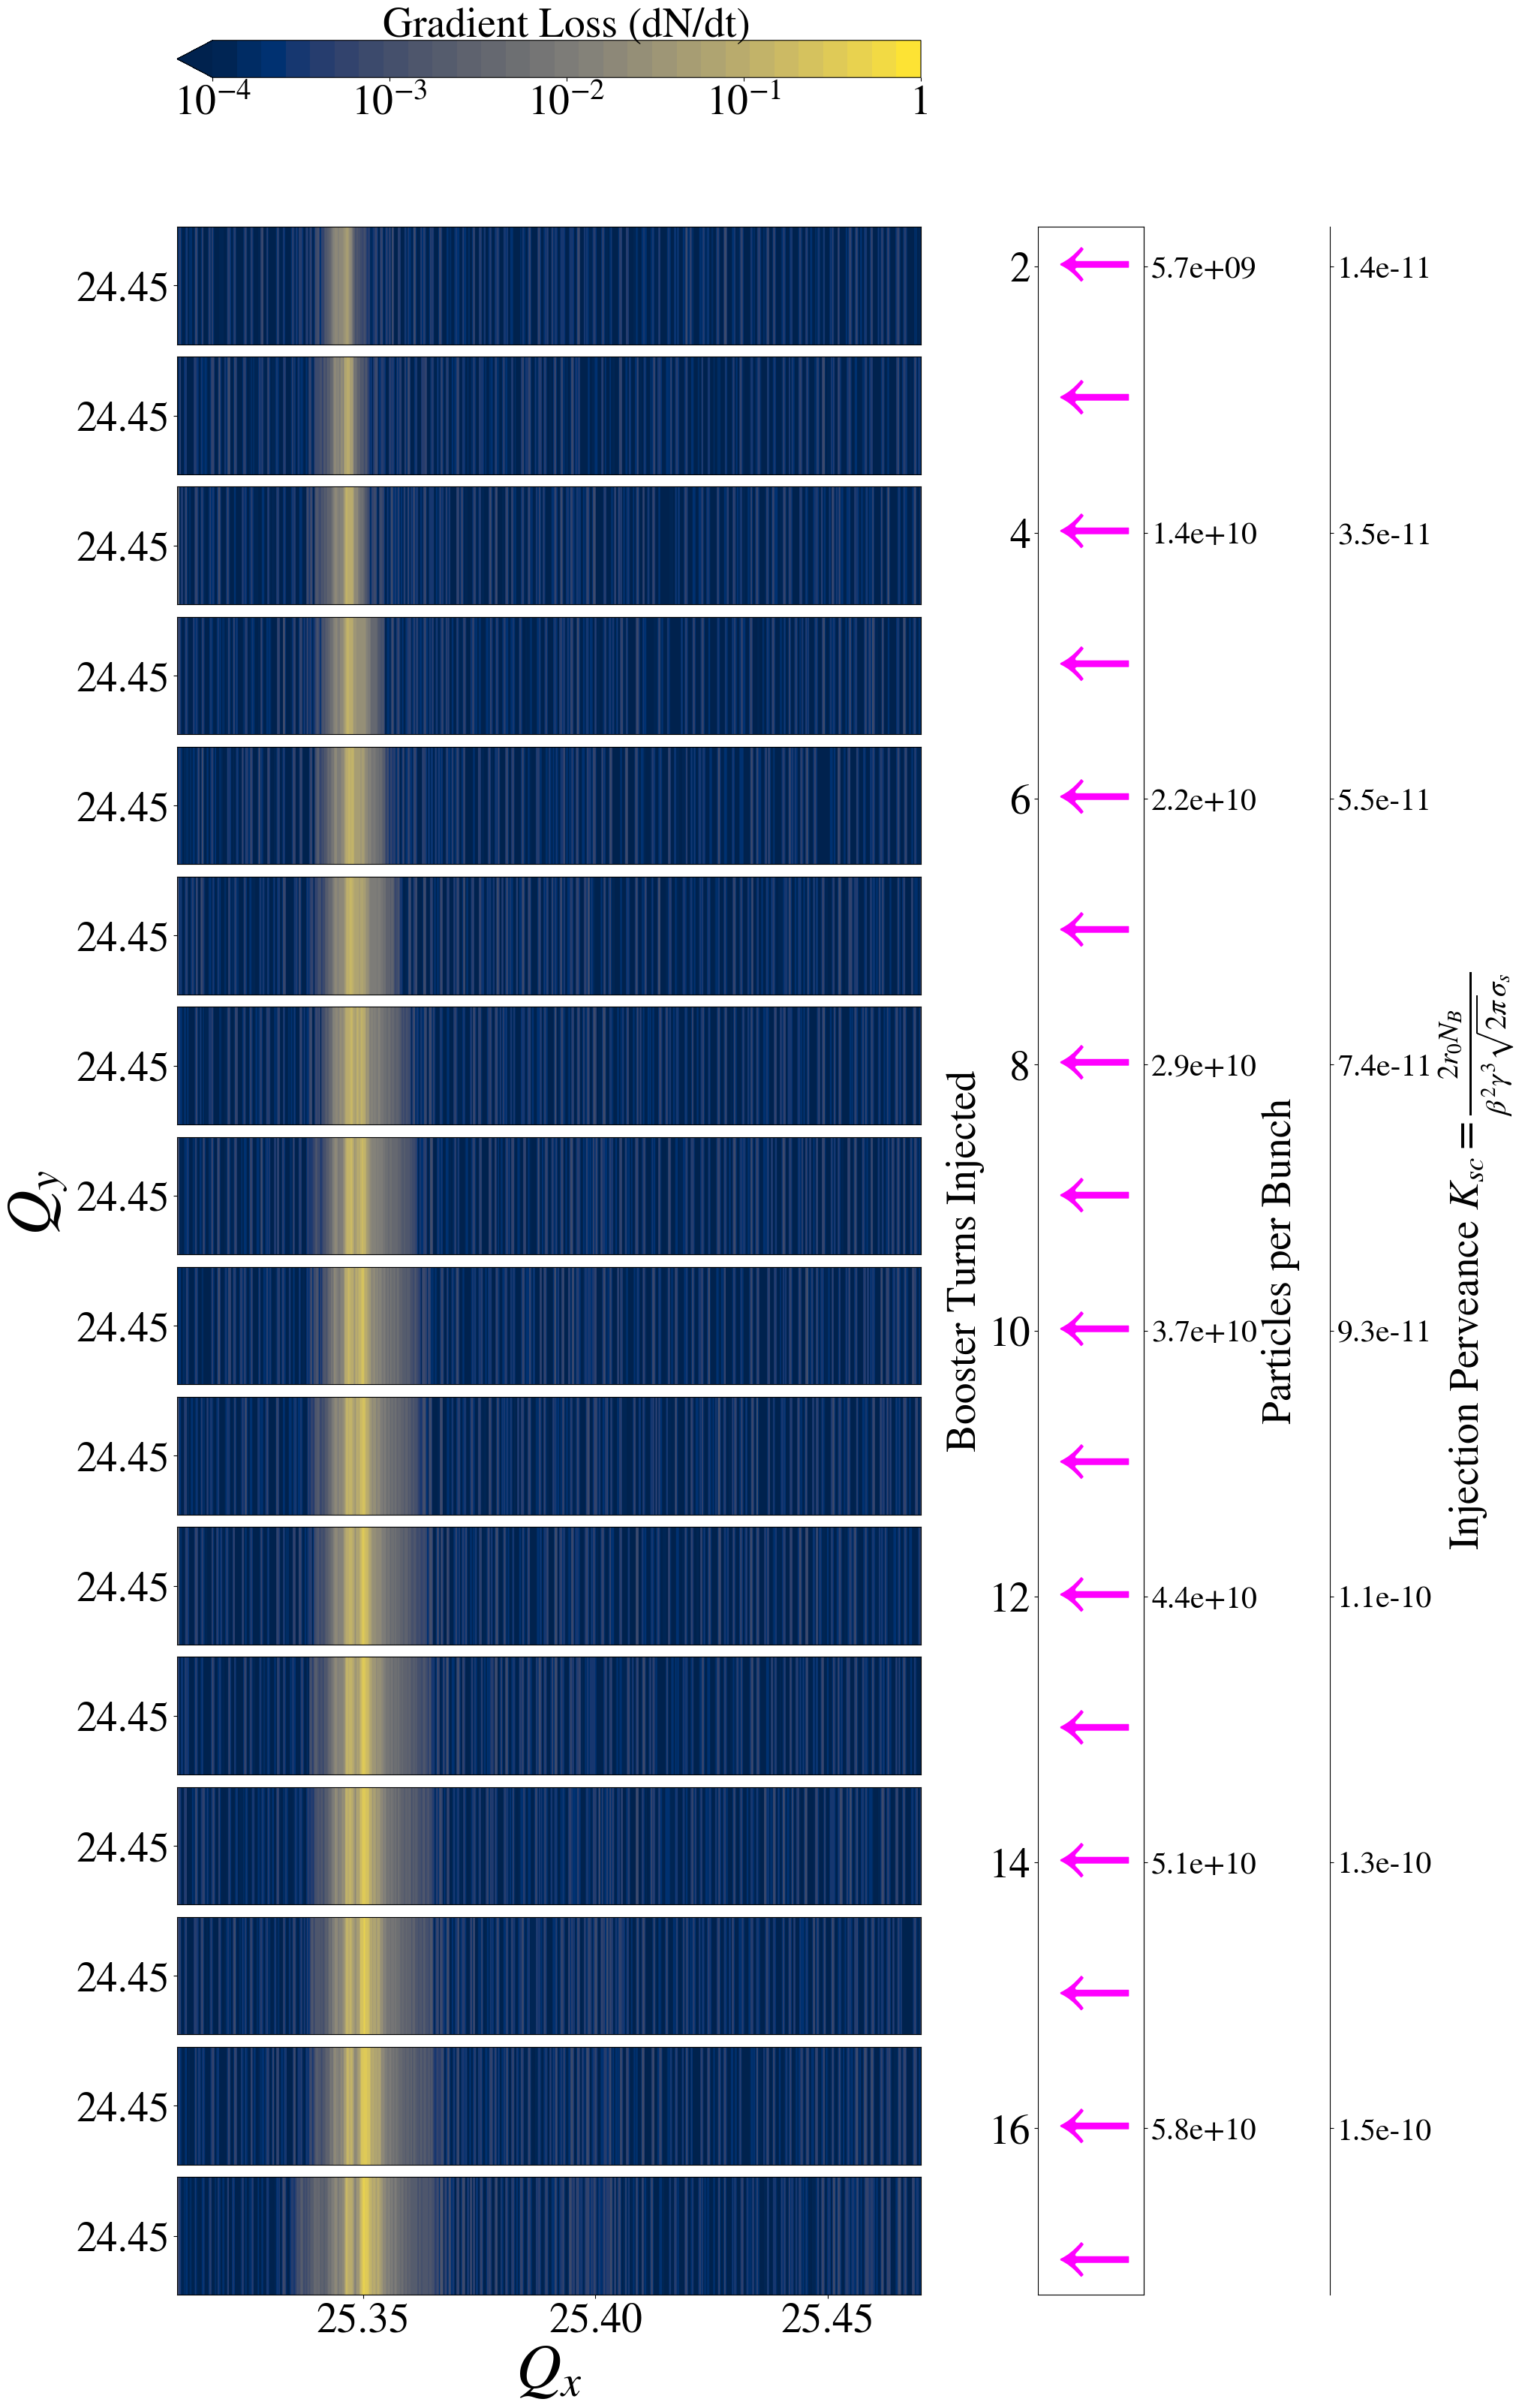

In [107]:
from matplotlib.gridspec import GridSpec
boosterturns = np.arange(2,18)

fig = plt.figure(layout="constrained",figsize = (20,2*len(files)))

gs = GridSpec(len(files),2, figure=fig, width_ratios = [7,1])
#fig, axs = plt.subplots(ncols=2, nrows=len(files), figsize = (20,2*len(files)), width_ratios=[3, 1.])

i = 0

lolim = -4
hilim = 0

levs = np.logspace(lolim,hilim,num = 30)
axs = []

ppbs = []

for boosterturnsi in boosterturns:
    
    ax = fig.add_subplot(gs[i,0])
    axs.append(ax)
    
    file = 'FULL/CG_05242023_%dTURNS.dat'%boosterturnsi
    
    ifile = open(file, 'rb')
    data = pickle.load(ifile, encoding="bytes")
    
    htune = []
    vtune = []
    
    time = []
    rbeam = []
    
    for measurement in data.keys():
        
        vtune.append(data[measurement][b'vtune'])
        htune.append(data[measurement][b'htune'])
    
        timei = np.array(data[measurement][b'time'])
        rbeami = np.array(data[measurement][b'beam'])
        
        mask1 = (timei>=0.038)*(timei<=0.81)
        #mask2 = rbeami>0.01
        mask = mask1#*mask2
        
        timeimasked = timei[mask]
        rbeamimasked = rbeami[mask]
        
        rbeaminti = interpolate.interp1d(timeimasked, rbeamimasked, kind = 'nearest-up')
        
        timeifinal = np.arange(0.04,0.8,0.001)
        rbeamifinal = rbeaminti(timeifinal)
        
        #axs[i].plot(timeifinal,rbeamifinal,'o',markersize=1)
        #axs[i].plot(timeimasked,np.gradient(rbeamimasked))
        
        time.append(timeifinal)
        rbeam.append(rbeamifinal)
        
    #print(htune,vtune)
    htune = np.mean(htune,axis=0)
    vtune = np.mean(vtune,axis=0)
    
    timeave = np.mean(time,axis=0)
    rbeamave = np.mean(rbeam,axis=0)
    
    steps = len(rbeamave)
    htuneplot = np.linspace(np.min(htune),np.max(htune),steps)
    vtuneplot = np.linspace(0.9999*np.min(vtune),1.0001*np.max(vtune),steps)
    
    gridx,gridy = np.meshgrid(htuneplot, vtuneplot)
    rbeamplot = np.tile(-np.gradient(rbeamave)[::-1],(steps,1))
    
    for k in range(rbeamplot.shape[0]):
        rbeamplot[k,rbeamplot[k,:]<=0]=10**lolim
    
    cf = axs[i].contourf(gridx,gridy,rbeamplot,locator=ticker.LogLocator(numticks=10),
                         levels=levs,cmap = 'cividis',extend = 'min')
    #axs[i].plot(timeave,np.gradient(rbeamave))
    
    totalrbeam = np.max(rbeamave)*1e12
    ppb = totalrbeam/81
    ppbs.append(ppb)
    #axs[i].set_title('BOOSTER TURNS=%d, R:BEAM=%.3e, PPB=%.3e'%(boosterturnsi,totalrbeam,ppb),fontsize = 28)
    
    axs[i].set_yticks([24.45])
    axs[i].set_yticklabels([r'24.45'],fontsize = 40)
    
    axs[i].tick_params(axis='x', labelsize=40)
    #axs[i].label_outer()
    
    if boosterturnsi != boosterturns[-1]:
        axs[i].get_xaxis().set_ticks([])
    #frame1.axes.get_yaxis().set_ticks([])
    
    i=i+1

plt.xlabel('$Q_x$',fontsize=60)
fig.supylabel('$Q_y$',fontsize=60)    

#--------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------
#cbar = fig.colorbar(cf, ticks=np.logspace(-4,0,num = 5))    
cbar = fig.colorbar(cf, ax=np.array(axs).ravel().tolist(), ticks=np.logspace(lolim,hilim,num = 5), 
                    orientation = 'horizontal', location = 'top', ticklocation = 'bottom')

cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.set_xticklabels([r'$10^{-4}$',r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'1'],fontsize = 40)
#cbar.ax.tick_params(axis='x', top=False, labeltop=True, bottom=True, labelbottom=False)
cbar.ax.set_xlabel('Gradient Loss (dN/dt)', fontsize = 40)

#--------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------
axright = fig.add_subplot(gs[:,1])
axright.scatter(np.zeros(len(boosterturns)),boosterturns, marker=r'$\leftarrow$', c = 'fuchsia', s=5000)

axright.set_ylim(1.7,17.25)
axright.get_xaxis().set_ticks([])

axright.invert_yaxis()
axright.tick_params(axis='y', labelsize=40)

axright.set_ylabel('Booster Turns Injected', fontsize = 40)

fun1 = interpolate.interp1d(boosterturns,ppbs,fill_value='extrapolate')
fun1inv = interpolate.interp1d(ppbs,boosterturns,fill_value='extrapolate')
twin1 = axright.secondary_yaxis('right',functions=(fun1,fun1inv))

kscs = (2*1.5346983e-18/(0.99**2*9.529**3*(2*np.pi)**0.5*0.5726))*np.array(ppbs)
fun2 = interpolate.interp1d(boosterturns,kscs,fill_value='extrapolate')
fun2inv = interpolate.interp1d(kscs,boosterturns,fill_value='extrapolate')
twin2 = axright.secondary_yaxis(2.75,functions=(fun2,fun2inv))

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
#twin1.spines.right.set_position(("axes", 1.2))
#twin2.spines.right.set_position(("axes", 3))

twin1.tick_params(axis='y', labelsize=30)
twin2.tick_params(axis='y', labelsize=30)

#twin1.scatter(np.zeros(len(ppbs)),ppbs)
twin1.set_ylabel('Particles per Bunch', fontsize = 40)
twin1.set_yticks(ppbs[::2])
twin1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
twin1.invert_yaxis()

twin2.set_ylabel(r'Injection Perveance $K_{sc}=\frac{2r_0 N_B}{\beta ^2 \gamma ^3 \sqrt{2 \pi} \sigma_s}$', fontsize = 40)
twin2.set_yticks(kscs[::2])
twin2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
twin2.invert_yaxis()

#--------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------

fig.patch.set_facecolor('white')
#plt.tight_layout()
plt.show()
plt.close()

/var/folders/42/7sv6hz7577n5zy69jc4nkh300000gn/T/ipykernel_54565/2625693633.py:73: RuntimeWarning: divide by zero encountered in divide
  rbeamplot = np.tile(-np.divide(np.gradient(rbeamave)[::-1],rbeamave[::-1]),(steps,1))
/var/folders/42/7sv6hz7577n5zy69jc4nkh300000gn/T/ipykernel_54565/2625693633.py:73: RuntimeWarning: invalid value encountered in divide
  rbeamplot = np.tile(-np.divide(np.gradient(rbeamave)[::-1],rbeamave[::-1]),(steps,1))


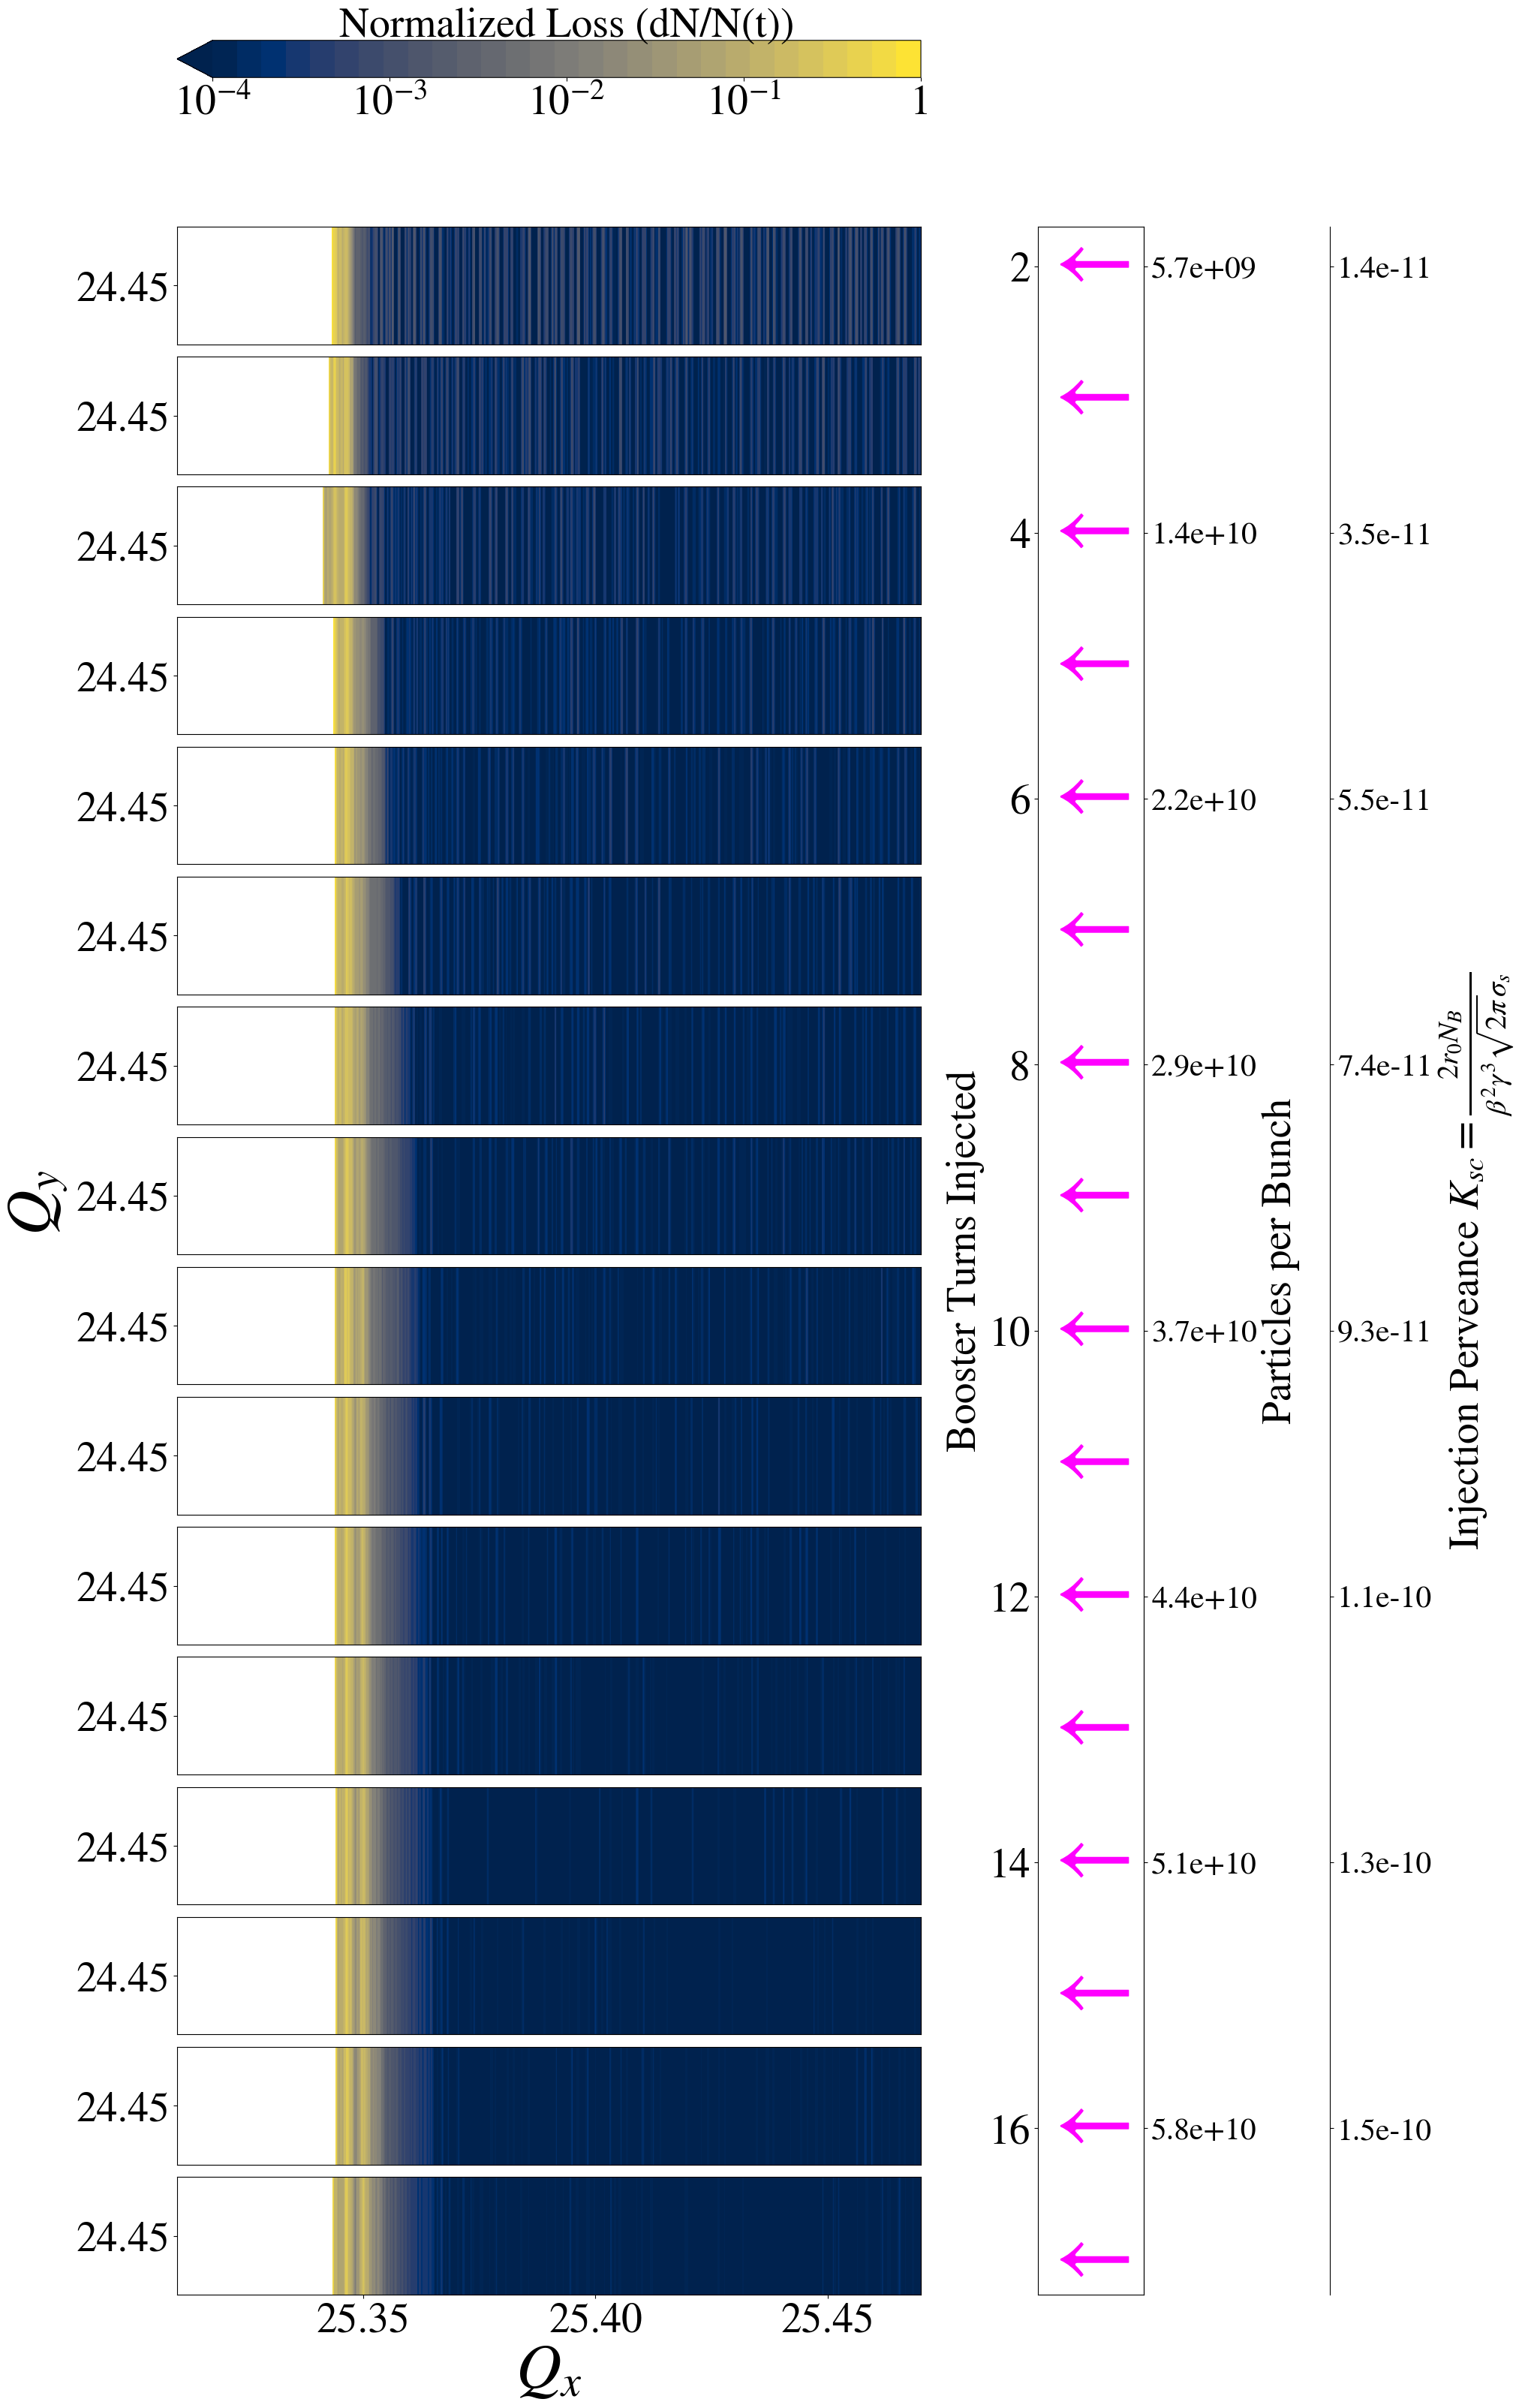

In [128]:
boosterturns = np.arange(2,18)

fig = plt.figure(layout="constrained",figsize = (20,2*len(files)))

gs = GridSpec(len(files),2, figure=fig, width_ratios = [7,1])
#fig, axs = plt.subplots(ncols=2, nrows=len(files), figsize = (20,2*len(files)), width_ratios=[3, 1.])

i = 0

lolim = -4
hilim = 0

levs = np.logspace(lolim,hilim,num = 30)
axs = []

ppbs = []

for boosterturnsi in boosterturns:
    
    ax = fig.add_subplot(gs[i,0])
    axs.append(ax)
    
    file = 'FULL/CG_05242023_%dTURNS.dat'%boosterturnsi
    
    ifile = open(file, 'rb')
    data = pickle.load(ifile, encoding="bytes")
    
    htune = []
    vtune = []
    
    time = []
    rbeam = []
    
    for measurement in data.keys():
        
        vtune.append(data[measurement][b'vtune'])
        htune.append(data[measurement][b'htune'])
    
        timei = np.array(data[measurement][b'time'])
        rbeami = np.array(data[measurement][b'beam'])
        
        mask1 = (timei>=0.038)*(timei<=0.81)
        #mask2 = rbeami>0.001
        mask = mask1#*mask2
        
        timeimasked = timei[mask]
        rbeamimasked = rbeami[mask]
        
        rbeaminti = interpolate.interp1d(timeimasked, rbeamimasked, kind = 'nearest-up')
        
        timeifinal = np.arange(0.04,0.8,0.001)
        rbeamifinal = rbeaminti(timeifinal)
        
        #axs[i].plot(timeifinal,rbeamifinal,'o',markersize=1)
        #axs[i].plot(timeimasked,np.gradient(rbeamimasked))
        
        time.append(timeifinal)
        rbeam.append(rbeamifinal)
        
    #print(htune,vtune)
    htune = np.mean(htune,axis=0)
    vtune = np.mean(vtune,axis=0)
    
    timeave = np.mean(time,axis=0)
    rbeamave = np.mean(rbeam,axis=0)
    rbeamave[rbeamave<0.02*np.max(rbeamave)] = 0
    
    steps = len(rbeamave)
    htuneplot = np.linspace(np.min(htune),np.max(htune),steps)
    vtuneplot = np.linspace(0.9999*np.min(vtune),1.0001*np.max(vtune),steps)
    
    gridx,gridy = np.meshgrid(htuneplot, vtuneplot)
    rbeamplot = np.tile(-np.divide(np.gradient(rbeamave)[::-1],rbeamave[::-1]),(steps,1))
    
    for k in range(rbeamplot.shape[0]):
        rbeamplot[k,rbeamplot[k,:]<=0]=10**lolim
    
    cf = axs[i].contourf(gridx,gridy,rbeamplot,locator=ticker.LogLocator(numticks=10),
                         levels=levs,cmap = 'cividis',extend = 'min')
    #axs[i].plot(timeave,np.gradient(rbeamave))
    
    totalrbeam = np.max(rbeamave)*1e12
    ppb = totalrbeam/81
    ppbs.append(ppb)
    #axs[i].set_title('BOOSTER TURNS=%d, R:BEAM=%.3e, PPB=%.3e'%(boosterturnsi,totalrbeam,ppb),fontsize = 28)
    
    axs[i].set_yticks([24.45])
    axs[i].set_yticklabels([r'24.45'],fontsize = 40)
    
    axs[i].tick_params(axis='x', labelsize=40)
    #axs[i].label_outer()
    
    if boosterturnsi != boosterturns[-1]:
        axs[i].get_xaxis().set_ticks([])
    #frame1.axes.get_yaxis().set_ticks([])
    
    i=i+1

plt.xlabel('$Q_x$',fontsize=60)
fig.supylabel('$Q_y$',fontsize=60)    

#--------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------
#cbar = fig.colorbar(cf, ticks=np.logspace(-4,0,num = 5))    
cbar = fig.colorbar(cf, ax=np.array(axs).ravel().tolist(), ticks=np.logspace(lolim,hilim,num = 5), 
                    orientation = 'horizontal', location = 'top', ticklocation = 'bottom')

cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.set_xticklabels([r'$10^{-4}$',r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'1'],fontsize = 40)
#cbar.ax.tick_params(axis='x', top=False, labeltop=True, bottom=True, labelbottom=False)
cbar.ax.set_xlabel('Normalized Loss (dN/N(t))', fontsize = 40)

#--------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------
axright = fig.add_subplot(gs[:,1])
axright.scatter(np.zeros(len(boosterturns)),boosterturns, marker=r'$\leftarrow$', c = 'fuchsia', s=5000)

axright.set_ylim(1.7,17.25)
axright.get_xaxis().set_ticks([])

axright.invert_yaxis()
axright.tick_params(axis='y', labelsize=40)

axright.set_ylabel('Booster Turns Injected', fontsize = 40)

fun1 = interpolate.interp1d(boosterturns,ppbs,fill_value='extrapolate')
fun1inv = interpolate.interp1d(ppbs,boosterturns,fill_value='extrapolate')
twin1 = axright.secondary_yaxis('right',functions=(fun1,fun1inv))

kscs = (2*1.5346983e-18/(0.99**2*9.529**3*(2*np.pi)**0.5*0.5726))*np.array(ppbs)
fun2 = interpolate.interp1d(boosterturns,kscs,fill_value='extrapolate')
fun2inv = interpolate.interp1d(kscs,boosterturns,fill_value='extrapolate')
twin2 = axright.secondary_yaxis(2.75,functions=(fun2,fun2inv))

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
#twin1.spines.right.set_position(("axes", 1.2))
#twin2.spines.right.set_position(("axes", 3))

twin1.tick_params(axis='y', labelsize=30)
twin2.tick_params(axis='y', labelsize=30)

#twin1.scatter(np.zeros(len(ppbs)),ppbs)
twin1.set_ylabel('Particles per Bunch', fontsize = 40)
twin1.set_yticks(ppbs[::2])
twin1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
twin1.invert_yaxis()

twin2.set_ylabel(r'Injection Perveance $K_{sc}=\frac{2r_0 N_B}{\beta ^2 \gamma ^3 \sqrt{2 \pi} \sigma_s}$', fontsize = 40)
twin2.set_yticks(kscs[::2])
twin2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
twin2.invert_yaxis()

#--------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------

fig.patch.set_facecolor('white')
#plt.tight_layout()
plt.show()
plt.close()

/var/folders/42/7sv6hz7577n5zy69jc4nkh300000gn/T/ipykernel_54565/2833874454.py:73: RuntimeWarning: divide by zero encountered in divide
  rbeamplot = np.tile(-np.divide(np.gradient(rbeamave)[::-1],rbeamave[::-1]),(steps,1))
/var/folders/42/7sv6hz7577n5zy69jc4nkh300000gn/T/ipykernel_54565/2833874454.py:73: RuntimeWarning: invalid value encountered in divide
  rbeamplot = np.tile(-np.divide(np.gradient(rbeamave)[::-1],rbeamave[::-1]),(steps,1))


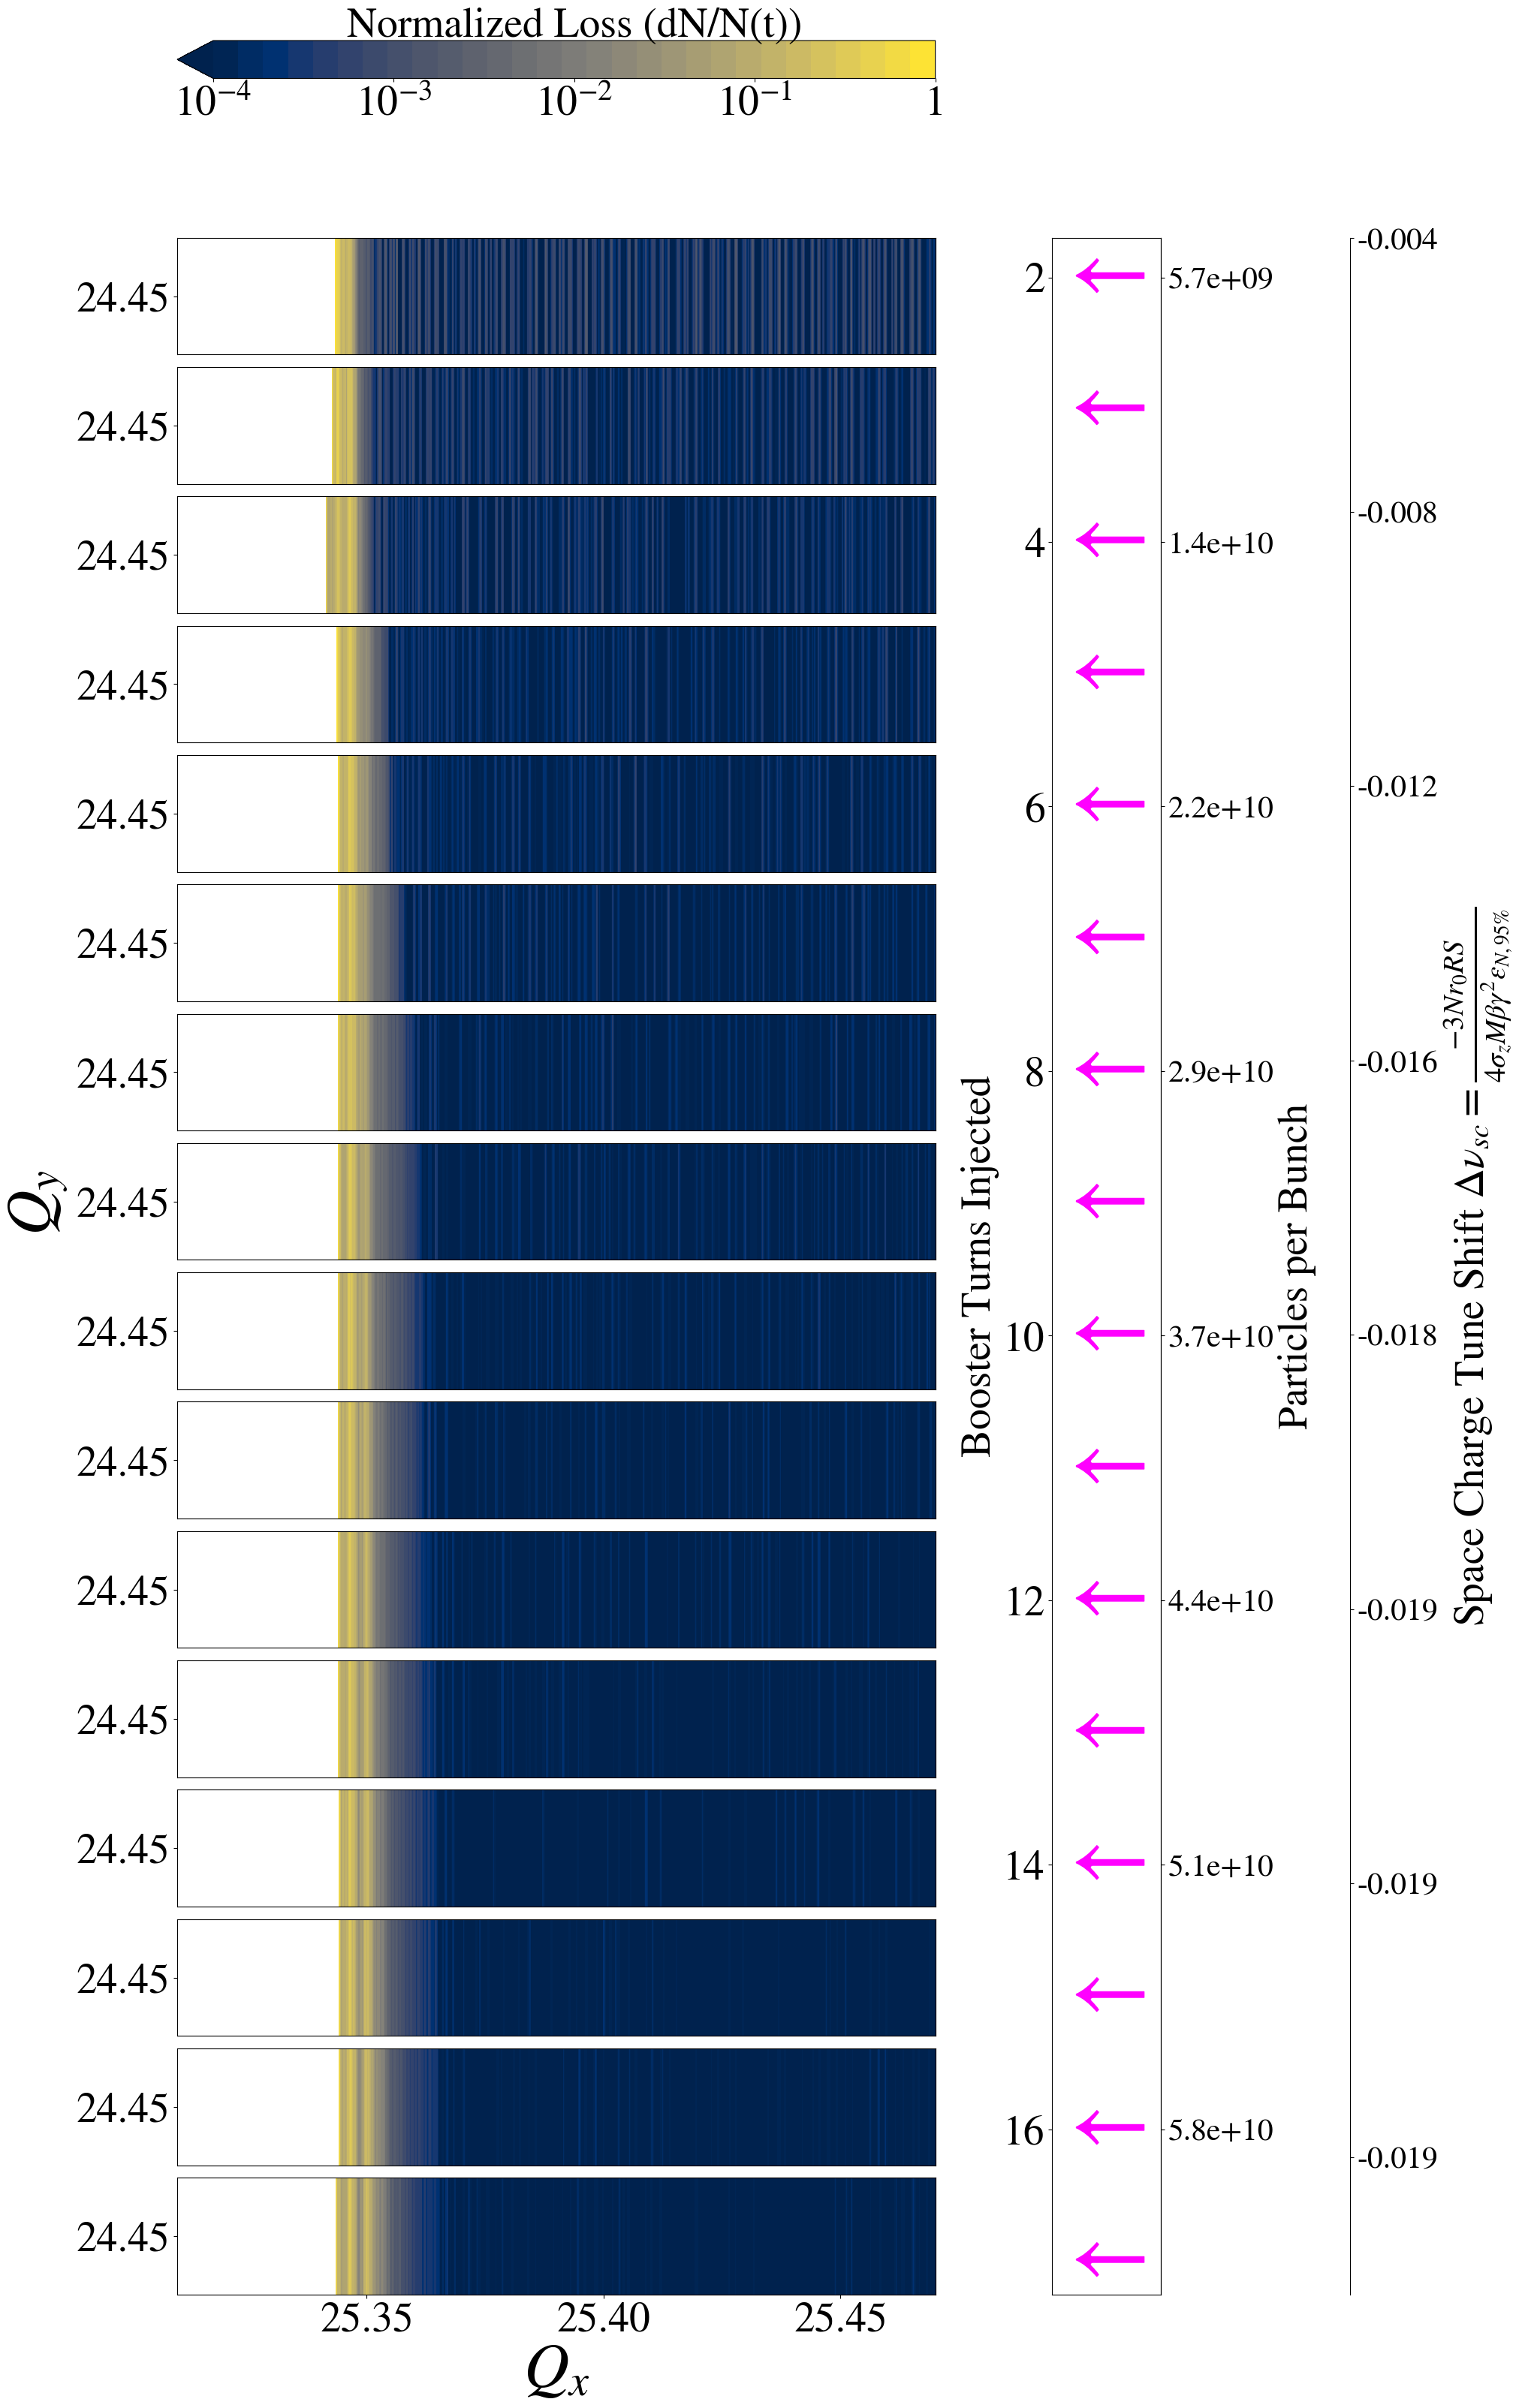

In [164]:
boosterturns = np.arange(2,18)

fig = plt.figure(layout="constrained",figsize = (20,2*len(files)))

gs = GridSpec(len(files),2, figure=fig, width_ratios = [7,1])
#fig, axs = plt.subplots(ncols=2, nrows=len(files), figsize = (20,2*len(files)), width_ratios=[3, 1.])

i = 0

lolim = -4
hilim = 0

levs = np.logspace(lolim,hilim,num = 30)
axs = []

ppbs = []

for boosterturnsi in boosterturns:
    
    ax = fig.add_subplot(gs[i,0])
    axs.append(ax)
    
    file = 'FULL/CG_05242023_%dTURNS.dat'%boosterturnsi
    
    ifile = open(file, 'rb')
    data = pickle.load(ifile, encoding="bytes")
    
    htune = []
    vtune = []
    
    time = []
    rbeam = []
    
    for measurement in data.keys():
        
        vtune.append(data[measurement][b'vtune'])
        htune.append(data[measurement][b'htune'])
    
        timei = np.array(data[measurement][b'time'])
        rbeami = np.array(data[measurement][b'beam'])
        
        mask1 = (timei>=0.038)*(timei<=0.81)
        #mask2 = rbeami>0.001
        mask = mask1#*mask2
        
        timeimasked = timei[mask]
        rbeamimasked = rbeami[mask]
        
        rbeaminti = interpolate.interp1d(timeimasked, rbeamimasked, kind = 'nearest-up')
        
        timeifinal = np.arange(0.04,0.8,0.001)
        rbeamifinal = rbeaminti(timeifinal)
        
        #axs[i].plot(timeifinal,rbeamifinal,'o',markersize=1)
        #axs[i].plot(timeimasked,np.gradient(rbeamimasked))
        
        time.append(timeifinal)
        rbeam.append(rbeamifinal)
        
    #print(htune,vtune)
    htune = np.mean(htune,axis=0)
    vtune = np.mean(vtune,axis=0)
    
    timeave = np.mean(time,axis=0)
    rbeamave = np.mean(rbeam,axis=0)
    rbeamave[rbeamave<0.02*np.max(rbeamave)] = 0
    
    steps = len(rbeamave)
    htuneplot = np.linspace(np.min(htune),np.max(htune),steps)
    vtuneplot = np.linspace(0.9999*np.min(vtune),1.0001*np.max(vtune),steps)
    
    gridx,gridy = np.meshgrid(htuneplot, vtuneplot)
    rbeamplot = np.tile(-np.divide(np.gradient(rbeamave)[::-1],rbeamave[::-1]),(steps,1))
    
    for k in range(rbeamplot.shape[0]):
        rbeamplot[k,rbeamplot[k,:]<=0]=10**lolim
    
    cf = axs[i].contourf(gridx,gridy,rbeamplot,locator=ticker.LogLocator(numticks=10),
                         levels=levs,cmap = 'cividis',extend = 'min')
    #axs[i].plot(timeave,np.gradient(rbeamave))
    
    totalrbeam = np.max(rbeamave)*1e12
    ppb = totalrbeam/81
    ppbs.append(ppb)
    #axs[i].set_title('BOOSTER TURNS=%d, R:BEAM=%.3e, PPB=%.3e'%(boosterturnsi,totalrbeam,ppb),fontsize = 28)
    
    axs[i].set_yticks([24.45])
    axs[i].set_yticklabels([r'24.45'],fontsize = 40)
    
    axs[i].tick_params(axis='x', labelsize=40)
    #axs[i].label_outer()
    
    if boosterturnsi != boosterturns[-1]:
        axs[i].get_xaxis().set_ticks([])
    #frame1.axes.get_yaxis().set_ticks([])
    
    i=i+1

plt.xlabel('$Q_x$',fontsize=60)
fig.supylabel('$Q_y$',fontsize=60)    

#--------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------
#cbar = fig.colorbar(cf, ticks=np.logspace(-4,0,num = 5))    
cbar = fig.colorbar(cf, ax=np.array(axs).ravel().tolist(), ticks=np.logspace(lolim,hilim,num = 5), 
                    orientation = 'horizontal', location = 'top', ticklocation = 'bottom')

cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.set_xticklabels([r'$10^{-4}$',r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'1'],fontsize = 40)
#cbar.ax.tick_params(axis='x', top=False, labeltop=True, bottom=True, labelbottom=False)
cbar.ax.set_xlabel('Normalized Loss (dN/N(t))', fontsize = 40)

#--------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------
axright = fig.add_subplot(gs[:,1])
axright.scatter(np.zeros(len(boosterturns)),boosterturns, marker=r'$\leftarrow$', c = 'fuchsia', s=5000)

axright.set_ylim(1.7,17.25)
axright.get_xaxis().set_ticks([])

axright.invert_yaxis()
axright.tick_params(axis='y', labelsize=40)

axright.set_ylabel('Booster Turns Injected', fontsize = 40)

fun1 = interpolate.interp1d(boosterturns,ppbs,fill_value='extrapolate')
fun1inv = interpolate.interp1d(ppbs,boosterturns,fill_value='extrapolate')
twin1 = axright.secondary_yaxis('right',functions=(fun1,fun1inv))

# r0 = 1.53469827e-18
# mproton = 938.2720813e6
# totalenergy = ((8.835e9)**2+(mproton)**2)**0.5
# gamma = totalenergy/mproton
# beta = np.sqrt(1-(1/gamma)**2)
# radius = 3319.4/(2*np.pi)
# S = 1.596
# sigmaz = 0.5726
# M = 81

databetiay = pandas.read_csv('emittancexy.csv',index_col=0)
databetiay = databetiay[databetiay['tuneshiftx']>-0.5]
databetiay = databetiay[databetiay['tuneshifty']>-0.5]

fun2 = interpolate.interp1d(databetiay['booster_turns'],databetiay['tuneshiftx'],kind='nearest',fill_value='extrapolate')
fun2inv = interpolate.interp1d(databetiay['tuneshiftx'],databetiay['booster_turns'],kind='nearest',fill_value='extrapolate')
twin2 = axright.secondary_yaxis(2.75,functions=(fun2,fun2inv))

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
#twin1.spines.right.set_position(("axes", 1.2))
#twin2.spines.right.set_position(("axes", 3))

twin1.tick_params(axis='y', labelsize=30)
twin2.tick_params(axis='y', labelsize=30)

#twin1.scatter(np.zeros(len(ppbs)),ppbs)
twin1.set_ylabel('Particles per Bunch', fontsize = 40)
twin1.set_yticks(ppbs[::2])
twin1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
twin1.invert_yaxis()

twin2.set_ylabel(r'Space Charge Tune Shift $\Delta \nu_{sc}=\frac{-3 N r_0 R S}{4 \sigma_z M \beta \gamma ^2 \varepsilon_{N,95\%}}$', fontsize = 40)
twin2.set_yticks(fun2(boosterturns)[::2])
twin2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
twin2.invert_yaxis()

#--------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------

fig.patch.set_facecolor('white')
#plt.tight_layout()
plt.show()
plt.close()

In [132]:
databetiay = pandas.read_csv('emittance.csv',index_col=0)

In [133]:
databetiay

,intensity,MW102_h,MW829,booster_turns,MW826,MW827,MW102_v,MW836,MW851,MW104,MW850,MW852,MW853,MW103,tuneshifts
0,0.575493,2.545705,8.298994,2.0,8.009361,7.895501,0.206943,13.148484,0.153117,11.606292,12.558543,0.008567,14.079012,7.098767,-0.003704
2,0.603800,2.641048,8.362989,2.0,8.108982,7.822971,0.206758,13.304267,0.153435,10.701833,14.390001,3.667749,14.324846,7.176121,-0.004215
7,0.586816,2.521283,8.436961,2.0,8.043678,7.944270,0.205643,13.174905,0.148282,11.702215,12.214876,0.016656,14.219312,6.932978,-0.003746
8,0.609461,2.574076,8.457971,2.0,8.212070,7.870743,0.218947,13.470060,0.140816,11.261277,13.275146,0.013249,14.465901,7.029169,-0.004043
9,0.586816,2.601075,8.409230,2.0,8.153228,7.877203,0.205687,13.312928,0.155558,11.967373,11.822147,0.005963,14.272048,7.123790,-0.003663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.581155,2.653641,8.142938,2.0,7.933193,7.686767,0.206443,13.388016,0.155242,11.261646,13.138258,0.004762,16.093468,6.616379,-0.003855
295,0.586816,2.696693,8.461822,2.0,8.159650,7.829993,0.205363,13.388023,0.148868,11.257407,13.693727,0.012465,16.998109,6.932770,-0.003894
296,4.753496,4.673064,16.727681,16.0,16.203467,15.856830,15.436021,21.057025,17.072456,19.206169,17.439883,0.011186,21.461654,14.494918,-0.018488
297,4.753496,4.585444,16.508937,16.0,15.922773,15.458055,15.048477,19.870518,16.653998,18.837882,17.128331,0.011681,21.201337,14.116803,-0.018850


(0.0, -0.04)

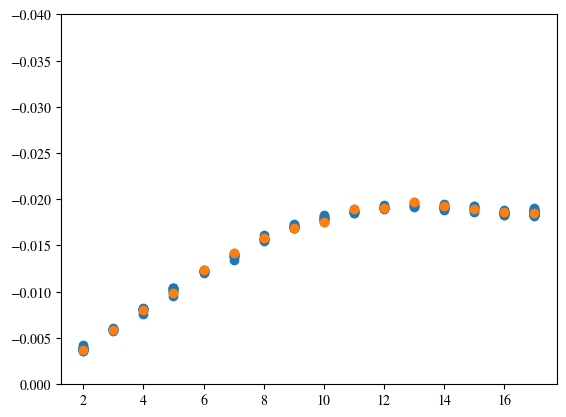

In [148]:
fun2 = interpolate.interp1d(databetiay['booster_turns'],databetiay['tuneshifts'],kind='nearest',fill_value='extrapolate')
plt.scatter(databetiay['booster_turns'],databetiay['tuneshifts'])
plt.scatter(boosterturns,fun2(boosterturns))
plt.ylim(0,-0.04)

In [147]:
fun2(2)

array(nan)

In [140]:
np.arange(2,18)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [144]:
databetiay['booster_turns']

0       2.0
2       2.0
7       2.0
8       2.0
9       2.0
       ... 
294     2.0
295     2.0
296    16.0
297    16.0
298    16.0
Name: booster_turns, Length: 183, dtype: float64

In [165]:
htune

array([25.46999924, 25.3099994 ])